In [1]:
#%pip install scikit-learn


In [ ]:
import mlflow
import numpy as np
import xgboost as xgb

mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

In [18]:
model_uri = "models/xgb_model"
xgb_model = mlflow.xgboost.load_model(model_uri)

In [120]:
with mlflow.start_run():
    X = np.array([-3,4,66,7]).reshape(-1,1)
    y = np.array([0,0,1,1])
    model = xgb.XGBClassifier(n_estimators=5)
    model.fit(X,y)
    signature = mlflow.models.infer_signature(X, model.predict(y))
    mlflow.set_tag("model","xgboost")

    mlflow.sklearn.log_model(model, artifact_path='models',signature=signature)

NameError: name 'mlflow' is not defined

## New experiment

In [1]:
#%pip install mlflow

import mlflow

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
%matplotlib inline

from sklearn.datasets import fetch_openml
import plotly.express as px




In [3]:
#fetch_openml?

In [4]:
X,y = fetch_openml(data_id=60,return_X_y=True)

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
X.head()

x1    x2    x3    x4    x5    x6    x7    x8    x9   x10  ...   x31  \
0 -0.23 -1.21  1.20  1.23 -0.10  0.12  2.49  1.19  1.34  0.58  ... -0.63   
1  0.38  0.38 -0.31 -0.09  1.52  1.35  1.49  3.81  2.33  1.34  ...  0.31   
2 -0.69  1.00  1.08  1.48  2.44  3.39  3.09  4.08  5.48  3.61  ...  0.93   
3  0.40  0.68  0.27  1.39  1.03 -0.32 -1.23 -0.50  0.11  0.87  ...  1.18   
4 -0.81  1.59 -0.69  1.16  4.22  4.98  4.52  2.54  5.60  4.66  ... -0.07   

    x32   x33   x34   x35   x36   x37   x38   x39   x40  
0 -0.86 -0.70  0.51  0.34 -0.13 -0.87  0.56 -0.53  0.29  
1  1.28  1.40  0.00 -0.18  0.71  0.04  0.91 -0.79  0.22  
2  0.29  1.12  0.60  0.28  2.17  0.18 -0.09 -1.33  1.00  
3  0.43 -0.30 -0.07 -0.99 -0.75  1.11  1.35 -1.63  0.10  
4  0.62  0.14  1.33 -1.87  1.48 -0.02 -0.58  0.93  0.40  

[5 rows x 40 columns]

In [6]:
fig = px.box(X)
fig.show()

In [7]:
X.shape

(5000, 40)

In [8]:
y = y.astype('int')

In [9]:
#prepare the demodata


In [10]:
#lets take a certain portion of the data to evaluate the most useful parameters
xgb_model  = xgb.XGBClassifier(learning_rate=0.5)
bst = xgb_model.fit(X[:100],y[:100])


In [11]:
y_demo_pred = bst.predict(X[200:250])
y_demo = y[200:250]
from sklearn.metrics import f1_score,accuracy_score
print(f"Accuracy is {accuracy_score(y_demo_pred,y_demo)}")
# the result is not very accurate however we are going somewhere

Accuracy is 0.76


Get the importance of the columns

In [12]:
bst.get_booster().get_score(importance_type='weight').values()

dict_values([4.0, 5.0, 15.0, 10.0, 16.0, 14.0, 11.0, 11.0, 16.0, 21.0, 6.0, 18.0, 4.0, 12.0, 9.0, 17.0, 5.0, 4.0, 5.0, 2.0, 14.0, 1.0, 5.0, 5.0, 1.0, 1.0, 3.0, 3.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 4.0, 5.0])

In [13]:
idx = bst.feature_importances_.argsort()
bst.feature_importances_[idx],idx

(array([0.        , 0.        , 0.        , 0.        , 0.00089776,
        0.0012054 , 0.0018719 , 0.00203181, 0.00210088, 0.00286016,
        0.00300872, 0.00332637, 0.00369057, 0.00462085, 0.00717949,
        0.00832578, 0.00973616, 0.01227153, 0.01286705, 0.01314239,
        0.0131727 , 0.01403859, 0.0198754 , 0.02659583, 0.02857619,
        0.03047544, 0.03140783, 0.03241467, 0.03396721, 0.03722366,
        0.03802549, 0.04090476, 0.04558307, 0.04680001, 0.04839583,
        0.06062922, 0.0612405 , 0.08194706, 0.09276281, 0.12682693],
       dtype=float32),
 array([34,  7, 28, 22, 39, 35, 33, 31, 29, 36, 19, 26, 21, 24, 32,  0, 37,
        13, 14, 30,  1, 25, 20, 12,  2, 38, 27, 11,  8,  9,  4,  6, 15, 17,
         3, 18, 23, 10, 16,  5]))

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

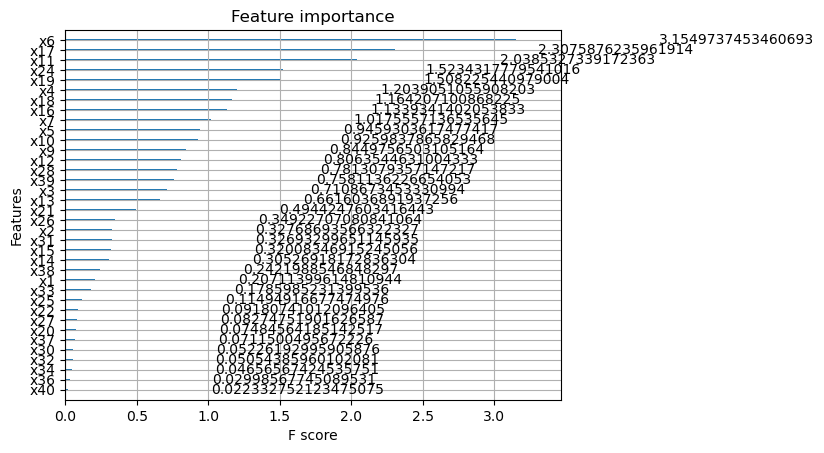

In [14]:
xgb.plot_importance(bst,importance_type='gain')

In [15]:
X_new = X.iloc[:,[12,  2, 38, 27, 11,  8,  9,  4,  6, 15, 17,3, 18, 23, 10, 16,  5]]

In [16]:
from sklearn.model_selection import train_test_split


#create the train and test dataset
X_train,X_test, y_train,y_test = train_test_split(X_new,y, test_size=0.15, shuffle=True, random_state=33)

In [17]:
#create the train and the validation dataset
X_train,X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,shuffle=True, random_state=44)

In [18]:
xgb.XGBRFClassifier().fit?

Object `fit` not found.


In [19]:
params={
    'learning_rate':0.05,
    'n_estimators':100,
    'max_depth':1000
}

In [20]:
mlflow.set_tracking_uri('http://localhost:5000')
mlflow.set_experiment('experiment_with_openml')

2024/01/27 00:28:35 INFO mlflow.tracking.fluent: Experiment with name 'Experiment with openml' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/3', creation_time=1706295516038, experiment_id='3', last_update_time=1706295516038, lifecycle_stage='active', name='Experiment with openml', tags={}>

In [26]:
with mlflow.start_run():
    xgb_model = xgb.XGBClassifier(params)
    mlflow.log_params(params)
    mlflow.set_tags({'model':'xgboost','data_id':60})

    xgb_model.fit(X_train,y_train)
    mlflow.sklearn.log_model(xgb_model, artifact_path='models')
    acc = accuracy_score(xgb_model.predict(X_val),y_val)
    mlflow.log_metric('accuracy_score',acc)

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/xgboost/core.py:727: FutureWarning:

Pass `objective` as keyword args.

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning:

Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning:

Setuptools is replacing distutils.



In [ ]:
#commit from local